<a href="https://colab.research.google.com/github/Jin0704/Prediction-of-quality-of-Wine/blob/main/%E5%B0%88%E6%A1%88%E5%AF%A6%E4%BD%9C_%E7%B4%85%E9%85%92%E5%93%81%E8%B3%AA%E5%88%86%E9%A1%9E%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [157]:
url='https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
full = pd.read_csv(url)
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [158]:
full.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [159]:
full.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


請根據 Kaggle 文件瞭解 winequality-red 資料中所有欄位的定義為何？
1.  fixed acidity 固定酸度
2.  volatile acidity 揮發性酸度
3.  citric acid 檸檬酸
4.  residual sugar 殘留糖分
5.  chlorides 氯化物
6.  free sulfur dioxide 游離二氧化硫
7.  total sulfur dioxide 總二氧化硫
8.  density 密度
9.  pH pH值
10.  sulphates 硫酸鹽
11.  alcohol 酒精含量
12. quality (score between 0 and 10) 品質（得分範圍在0到10之間）



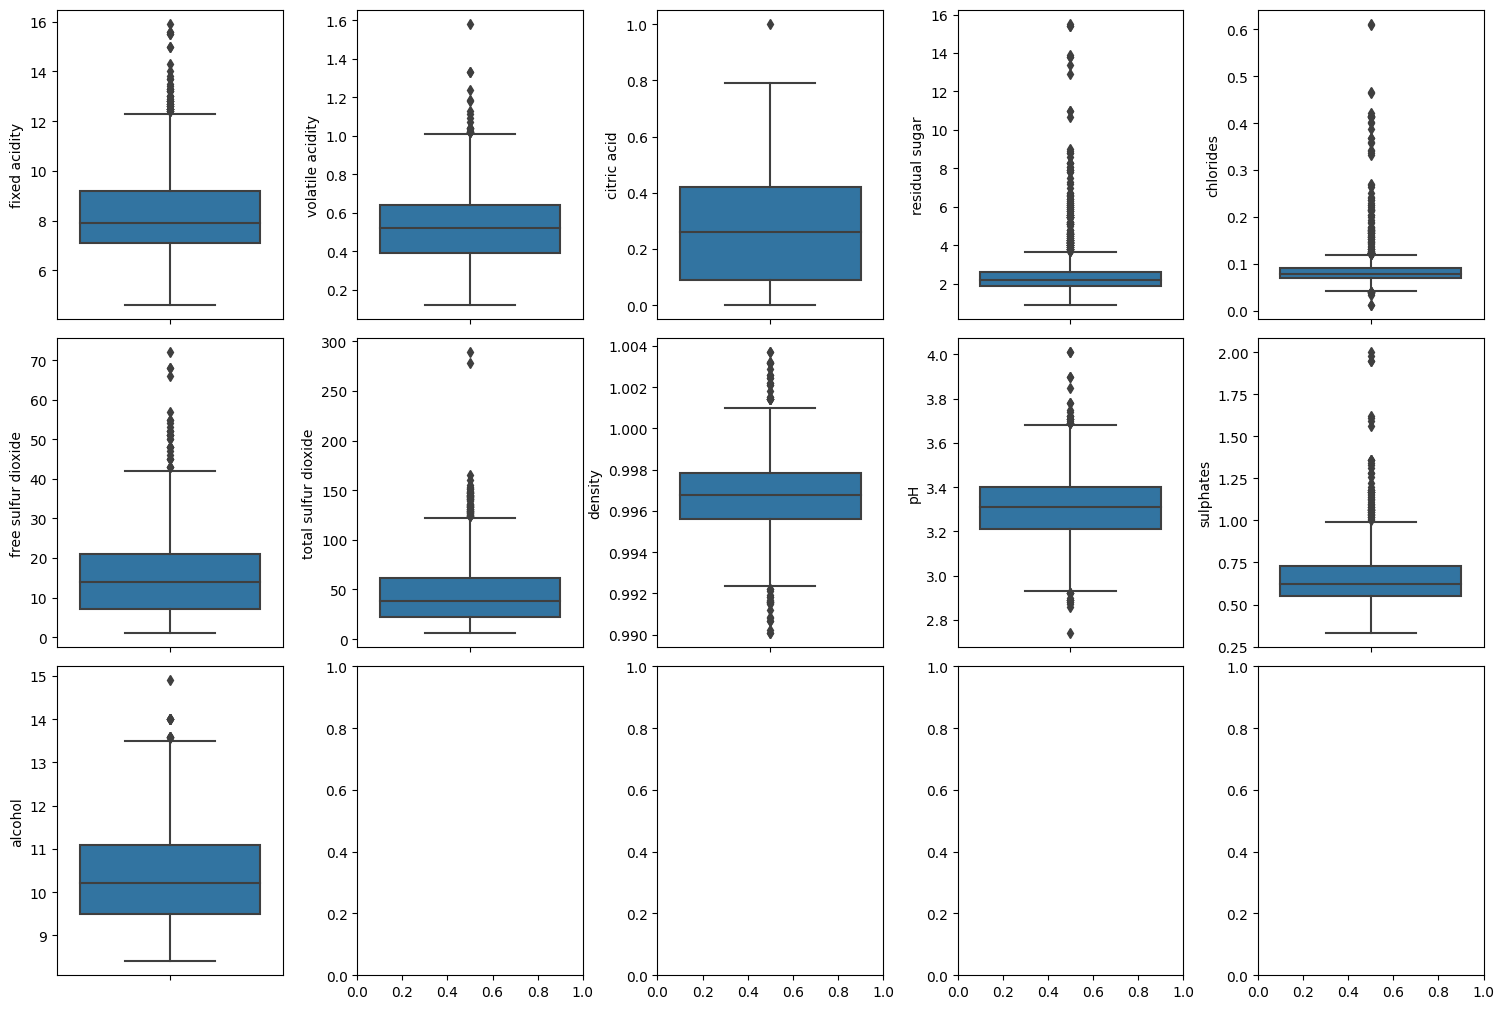

In [160]:
#請你嘗試觀察每一個「特徵」欄位（除 quality 外）資料的分佈情況，有看出什麼結果嗎？
fig,ax= plt.subplots(ncols=5,nrows=3,figsize=(15,10))
ax = ax.flatten()
index = 0
for i in full.columns:
  if i != 'quality':
    sns.boxplot(y=i,data=full,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show()

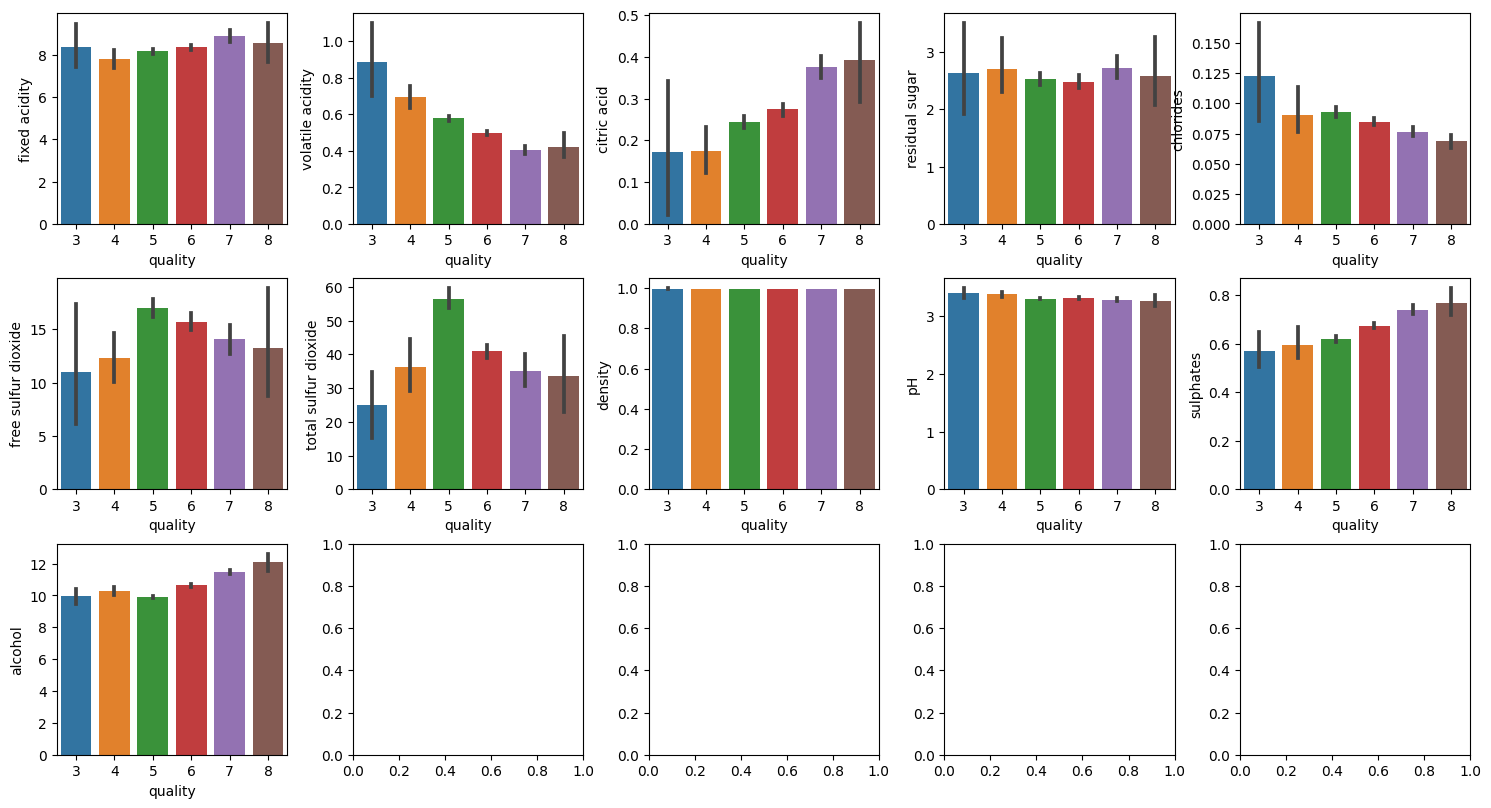

In [161]:
#請你嘗試觀察每一個「標籤」欄位（quality）資料的分佈情況，有看出什麼結果嗎？
fig,ax=plt.subplots(ncols=5,nrows=3,figsize=(15,8))
ax = ax.flatten()
index = 0
for i in full.columns:
  if i != 'quality':
    sns.barplot(x='quality', y=i, data=full, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show()
#可以明確看出，fixed acidity,density,ph這幾個欄位的對quality來說沒有什麼區別性
#品質越高的酒，volatile acidity 揮發性酸度越高，citric acid 檸檬酸含量越高

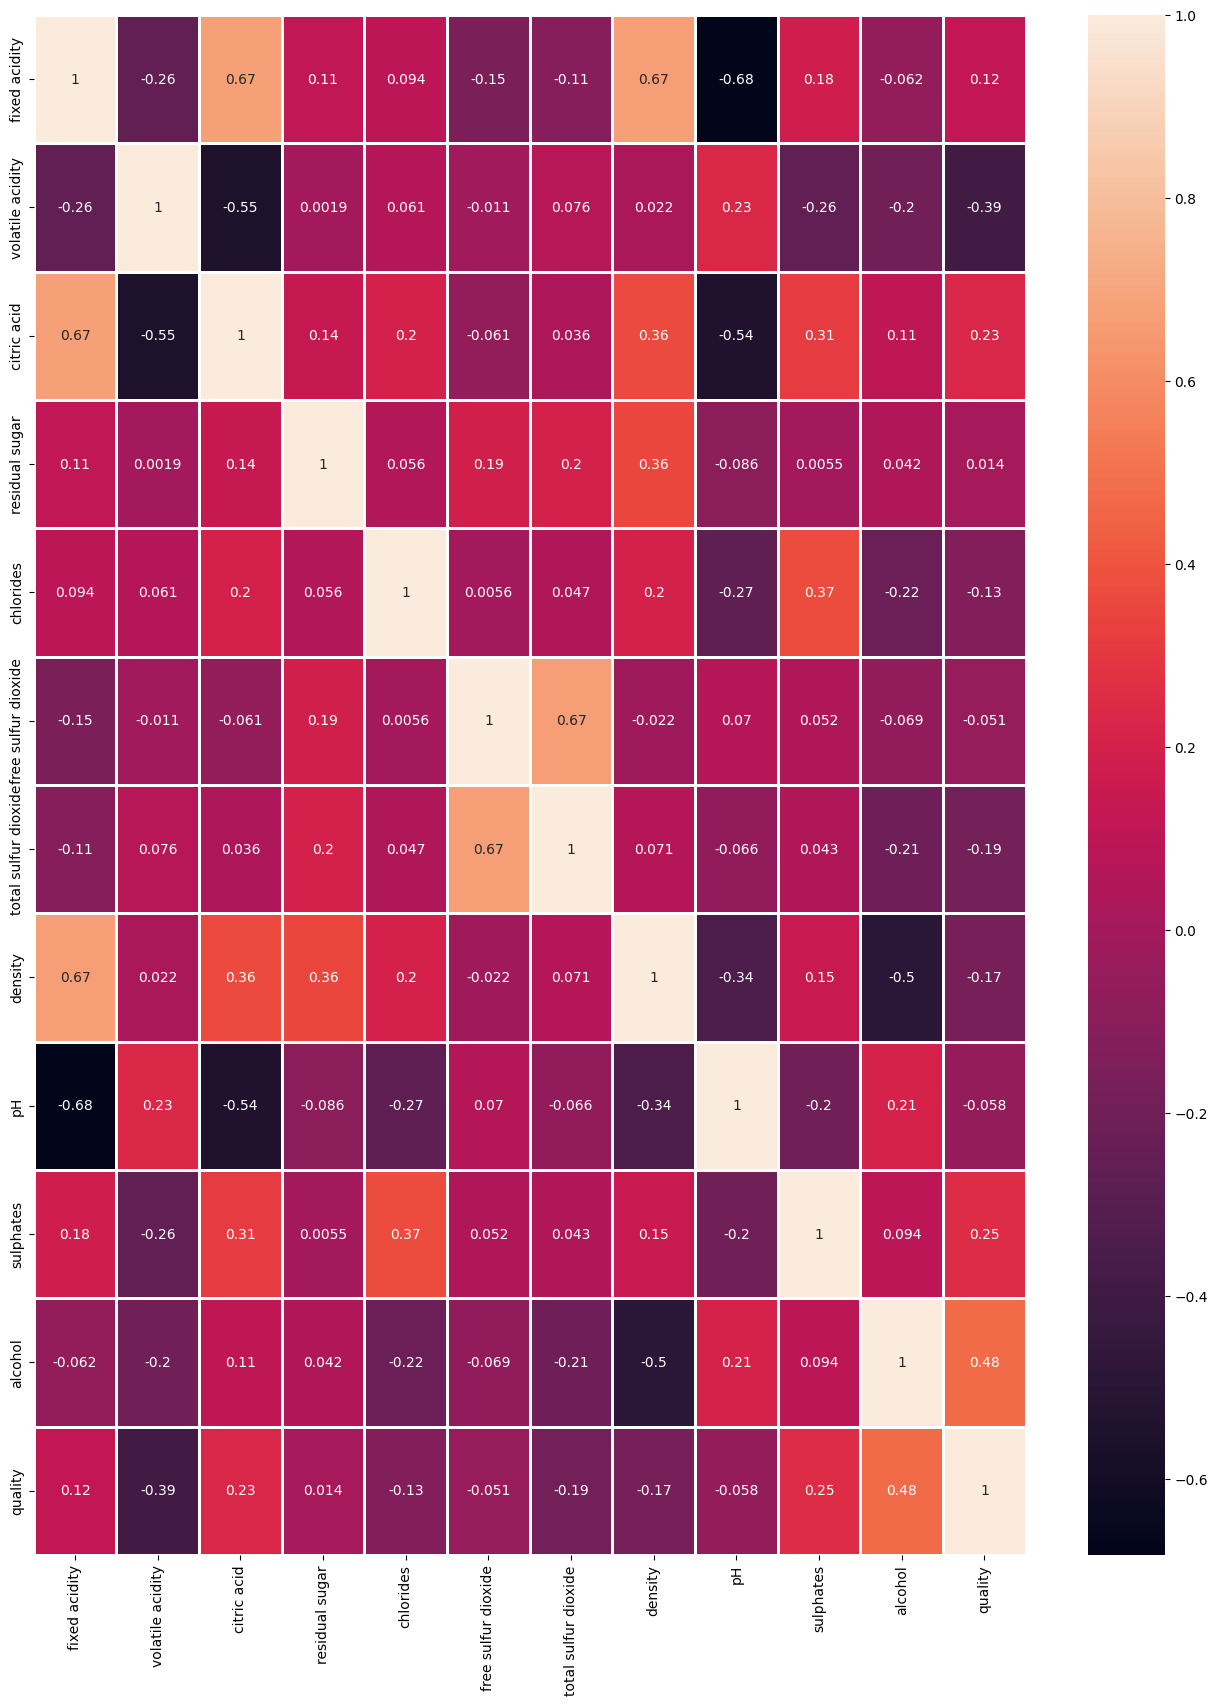

In [162]:
#用heatmap觀察特徵之間的corr
fig,ax = plt.subplots(figsize=(16,20))
sns.heatmap(full.corr(),annot=True,linewidth=1)
plt.show()
#之後就可以針對關聯性高的欄位可以保留一個，以降低CPU的運算，加快模型的運算速度

In [163]:
#建立第一個 Baseline 版本
#確保資料是否有缺失值及欄位中的資料型態是否可使用
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [164]:
X = full.drop('quality', axis=1)
y = full['quality']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator=rfc,X=X_train,y=y_train,cv=5)
print(rfc_eval)
print(rfc_eval.mean())

[0.66015625 0.69140625 0.64453125 0.69921875 0.75294118]
0.6896507352941177


In [165]:
#運用資料與特徵優化分析

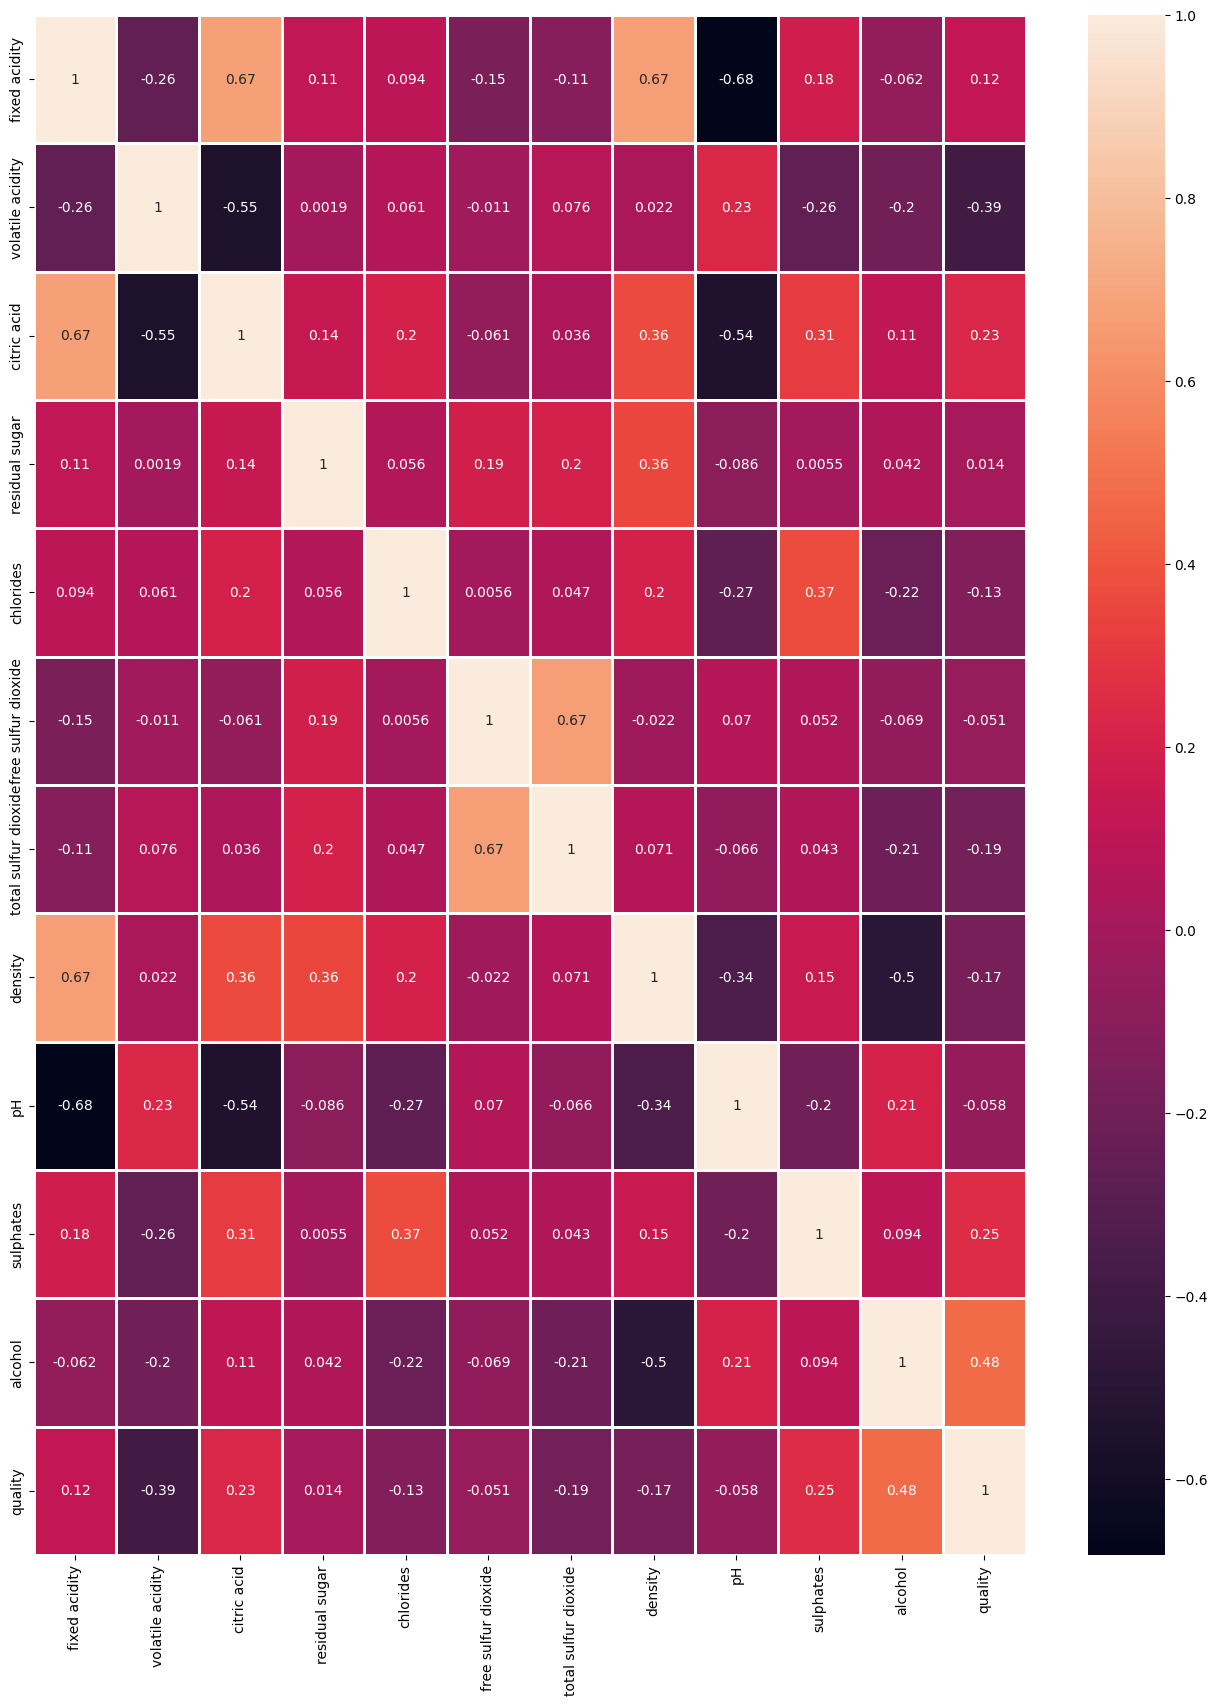

In [166]:
fig,ax = plt.subplots(figsize=(16,20))
sns.heatmap(full.corr(),annot=True,linewidth=1)
plt.show()

In [167]:
#請嘗試觀察與標籤欄位「紅酒品質 quality」關係比較大的特徵欄位有哪些？你是如何定義「關係大」的呢？
#觀察關係係數的值，可以得知跟quality關係較大的四個欄位有 alcohol ,volatile acidity , citric acid ,sulphates
qualityCorr = full.corr()['quality']
filter = qualityCorr[qualityCorr.apply(lambda c: abs(c)>0.1)].sort_values()
exclude_condition = qualityCorr[qualityCorr.apply(lambda c: abs(c)<=0.1)].sort_values()
print(filter)
print(exclude_condition)

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64
pH                    -0.057731
free sulfur dioxide   -0.050656
residual sugar         0.013732
Name: quality, dtype: float64


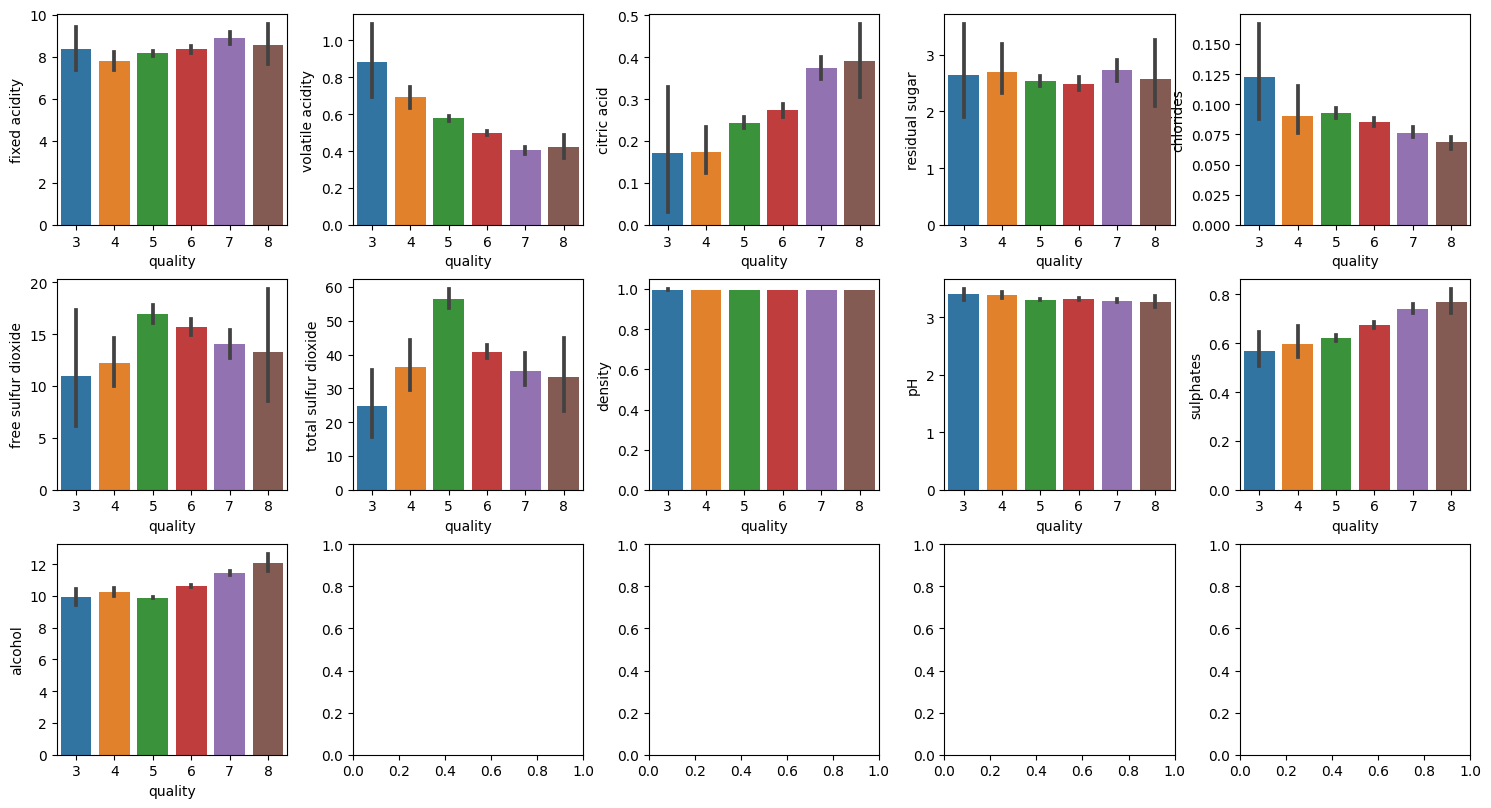

In [168]:
fig,ax=plt.subplots(ncols=5,nrows=3,figsize=(15,8))
ax = ax.flatten()
index = 0
for i in full.columns:
  if i != 'quality':
    sns.barplot(x='quality', y=i, data=full, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show()
#請問資料中有哪些「欄位」你覺得是多餘的，在分析過程中應該被排除的呢？為什麼？
#參考關係係數跟分布圖，可以推論ph值應該是最不需要考慮的欄位，其餘像是fixed acidity,density,甚至residual sugar這三個欄位也可以是不被考慮的欄位

In [169]:
#請你針對「數值型」的幾個欄位，嘗試比較不同的正規化方法（例如：Standardize、Min-Max Normalization）？
full.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [170]:
# #用MinMaxScaler處理free sulfur dioxide及total sulfur dioxide
# scaler = MinMaxScaler()
# x = full['free sulfur dioxide'].values.reshape(-1,1)
# full['fsd']=scaler.fit_transform(x)
# full.head(10)

In [171]:
#特徵工程
full['mso2']=full['free sulfur dioxide']/(1+10**full['pH']-1.81)

<Axes: xlabel='quality'>

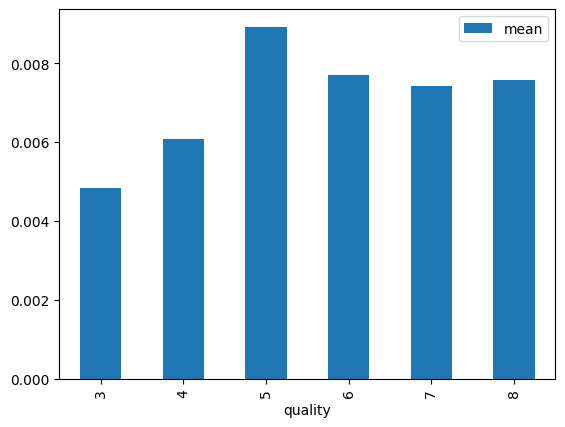

In [172]:
full.groupby("quality")['mso2'].aggregate(['mean']).plot.bar()

In [173]:
#刪除相關性高的冗餘特徵
# density & fixed acidity , free sulfur dioxide &  total sulfur dioxide
df = full.drop(columns='density')
df = df.drop(columns='total sulfur dioxide')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixed acidity        1599 non-null   float64
 1   volatile acidity     1599 non-null   float64
 2   citric acid          1599 non-null   float64
 3   residual sugar       1599 non-null   float64
 4   chlorides            1599 non-null   float64
 5   free sulfur dioxide  1599 non-null   float64
 6   pH                   1599 non-null   float64
 7   sulphates            1599 non-null   float64
 8   alcohol              1599 non-null   float64
 9   quality              1599 non-null   int64  
 10  mso2                 1599 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 137.5 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,quality,mso2
0,7.4,0.70,0.00,1.9,0.076,11.0,3.51,0.56,9.4,5,0.003400
1,7.8,0.88,0.00,2.6,0.098,25.0,3.20,0.68,9.8,5,0.015782
2,7.8,0.76,0.04,2.3,0.092,15.0,3.26,0.65,9.8,5,0.008247
3,11.2,0.28,0.56,1.9,0.075,17.0,3.16,0.58,9.8,6,0.011768
4,7.4,0.70,0.00,1.9,0.076,11.0,3.51,0.56,9.4,5,0.003400


In [174]:
scaler = MinMaxScaler()
features_columns = df.columns.difference(['quality'])
df[features_columns] = scaler.fit_transform(df[features_columns])

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,quality,mso2
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.606299,0.137725,0.153846,5,0.051979
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.362205,0.209581,0.215385,5,0.265727
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.409449,0.191617,0.215385,5,0.135646
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.330709,0.149701,0.215385,6,0.196428
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.606299,0.137725,0.153846,5,0.051979


In [175]:
#將quality 分為 good,bad
bins = (0,6.5,10)
group_names = ['bad','good']
df['quality'] = pd.cut(df['quality'],bins=bins,labels=group_names)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,quality,mso2
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.606299,0.137725,0.153846,bad,0.051979
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.362205,0.209581,0.215385,bad,0.265727
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.409449,0.191617,0.215385,bad,0.135646
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.330709,0.149701,0.215385,bad,0.196428
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.606299,0.137725,0.153846,bad,0.051979
5,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.606299,0.137725,0.153846,bad,0.062651
6,0.292035,0.328767,0.06,0.047945,0.095159,0.197183,0.440945,0.077844,0.153846,bad,0.123115
7,0.238938,0.363014,0.00,0.020548,0.088481,0.197183,0.511811,0.083832,0.246154,good,0.098806
8,0.283186,0.315068,0.02,0.075342,0.101836,0.112676,0.488189,0.143713,0.169231,good,0.061126
9,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.480315,0.281437,0.323077,bad,0.124418


In [176]:
#將字串轉成數值形式
label_encoder = LabelEncoder()
#Bad becomes 0 and good becomes 1
df['quality']=label_encoder.fit_transform(df['quality'])
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,quality,mso2
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.606299,0.137725,0.153846,0,0.051979
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.362205,0.209581,0.215385,0,0.265727
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.409449,0.191617,0.215385,0,0.135646
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.330709,0.149701,0.215385,0,0.196428
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.606299,0.137725,0.153846,0,0.051979
5,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.606299,0.137725,0.153846,0,0.062651
6,0.292035,0.328767,0.06,0.047945,0.095159,0.197183,0.440945,0.077844,0.153846,0,0.123115
7,0.238938,0.363014,0.00,0.020548,0.088481,0.197183,0.511811,0.083832,0.246154,1,0.098806
8,0.283186,0.315068,0.02,0.075342,0.101836,0.112676,0.488189,0.143713,0.169231,1,0.061126
9,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.480315,0.281437,0.323077,0,0.124418


<Axes: >

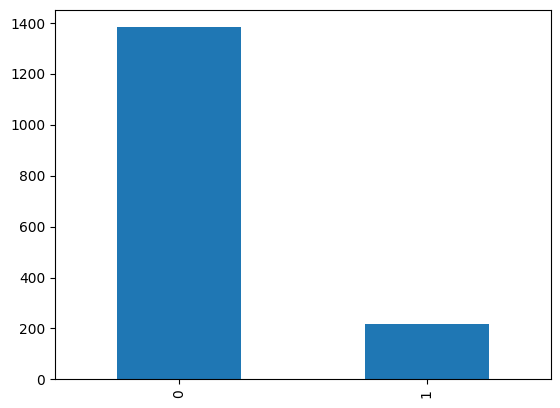

In [177]:
#檢查資料集是否有不平衡
df['quality'].value_counts().plot.bar()

In [179]:
X = df.drop('quality',axis=1)
y = df['quality']

# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# 建立SMOTE物件並過採樣訓練集 來處理資料集不平衡的問題
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 現在X_train_resampled和y_train_resampled中的品質評分數量已平衡

In [180]:
display(X_train.shape)
display(X_test.shape)
display(X_train_resampled)

(1279, 10)

(320, 10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,mso2
0,0.495575,0.205479,0.570000,0.171233,0.096828,0.042254,0.236220,0.179641,0.184615,0.056305
1,0.300885,0.041096,0.370000,0.000000,0.061770,0.492958,0.118110,0.065868,0.661538,0.794726
2,0.230088,0.332192,0.020000,0.068493,0.140234,0.126761,0.566929,0.119760,0.523077,0.053156
3,0.336283,0.171233,0.430000,0.095890,0.085142,0.154930,0.338583,0.287425,0.430769,0.133414
4,0.274336,0.356164,0.210000,0.089041,0.108514,0.436620,0.417323,0.071856,0.230769,0.290077
...,...,...,...,...,...,...,...,...,...,...
2205,0.238938,0.246575,0.320000,0.082192,0.083472,0.422535,0.440945,0.191617,0.246154,0.261603
2206,0.226340,0.327840,0.019215,0.086140,0.128358,0.131621,0.559641,0.147845,0.456230,0.054978
2207,0.055201,0.261229,0.032869,0.049573,0.070117,0.206648,0.635537,0.204968,0.595587,0.070931
2208,0.647710,0.127592,0.500109,0.062954,0.110594,0.160933,0.195344,0.209712,0.230769,0.211010


In [185]:
X_train_resampled.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  pH        sulphates  alcohol   mso2    
0.725664       0.123288          0.740000     0.116438        0.138564   0.112676             0.362205  0.263473   0.369231  0.091362    8
0.238938       0.246575          0.320000     0.082192        0.083472   0.422535             0.440945  0.191617   0.246154  0.261603    5
0.327434       0.109589          0.480000     0.082192        0.135225   0.070423             0.409449  0.173653   0.615385  0.050228    5
0.194690       0.321918          0.060000     0.349315        0.080134   0.140845             0.527559  0.155689   0.369231  0.067182    5
0.398230       0.116438          0.330000     0.078767        0.085142   0.169014             0.409449  0.305389   0.507692  0.116664    5
                                                                                                                                        ..
0.273873       0.129363         

In [187]:
#訓練模型
rfc = RandomForestClassifier(n_estimators=20, random_state=42)
rfc_eval = cross_val_score(estimator=rfc,X=X_train,y=y_train,cv=5)
display(rfc_eval)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
print(pred_rfc)
#用處理不平衡後的資料來做訓練
rfc_eval_after = cross_val_score(estimator=rfc,X=X_train_resampled,y=y_train_resampled,cv=5)

rfc.fit(X_train_resampled,y_train_resampled)
pred_rfc_af = rfc.predict(X_test)
print('***')
display(rfc_eval_after)
print(pred_rfc_af)

array([0.90234375, 0.875     , 0.87109375, 0.890625  , 0.89019608])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
***


array([0.9321267 , 0.9321267 , 0.92760181, 0.93891403, 0.94570136])

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [189]:
#model performance
print(classification_report(y_test,pred_rfc))
print('After sample')
print(classification_report(y_test,pred_rfc_af))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       277
           1       0.96      0.51      0.67        43

    accuracy                           0.93       320
   macro avg       0.94      0.75      0.81       320
weighted avg       0.93      0.93      0.92       320

After sample
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       277
           1       0.69      0.67      0.68        43

    accuracy                           0.92       320
   macro avg       0.82      0.81      0.82       320
weighted avg       0.91      0.92      0.92       320



In [191]:
#用LogisticRegression model
clf = LogisticRegression().fit(X_train,y_train)
clf_after = LogisticRegression().fit(X_train_resampled,y_train_resampled)
pred_clf = clf.predict(X_test)
pred_clf_af = clf_after.predict(X_test)

In [192]:
#LogisticRegression model performance
print(classification_report(y_test,pred_clf))
print('After sample')
print(classification_report(y_test,pred_clf_af))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       277
           1       0.60      0.14      0.23        43

    accuracy                           0.87       320
   macro avg       0.74      0.56      0.58       320
weighted avg       0.84      0.87      0.84       320

After sample
              precision    recall  f1-score   support

           0       0.97      0.83      0.90       277
           1       0.43      0.81      0.56        43

    accuracy                           0.83       320
   macro avg       0.70      0.82      0.73       320
weighted avg       0.89      0.83      0.85       320



In [193]:
#請問「不平衡」的標籤欄位資料可能會造成怎樣的影響，請你試著去解決不平衡的問題
#從上述的兩個model給的回饋來看，當有不平衡資料時，在預測是否為高品質(也是我們希望知道的答案時)的紅酒表現會非常的差，主因是原先的資料集bad:good的紅酒比重將近是7:1
#後續使用SMOTE算法來合成少數的分類樣本(quality=1)的資料，就可以看到預測表現有顯著的提升